In [3]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
import warnings
import mplcursors
#from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,classification_report
warnings.filterwarnings('ignore')
# Setting the default styling attributes for seaborn
sns.set_theme(style='darkgrid')

In [4]:
#Read CSV
WeatherAUS=pd.read_csv('G:/Work/weatherAUS.csv')

In [5]:
WeatherAUS


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Exploratory Data Analysis

In [6]:
#Data Preview
WeatherAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
WeatherAUS.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Summary Info and Stats

In [8]:
WeatherAUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Observations:
1)-The Date column needs converted to a datetime datatype.
2)-The datatypes for all other columns look good as is.
3)-There appears to be a large number of missing values across multiple columns.

-Looking into the number of missing values per column as a percentage:

In [9]:
round(WeatherAUS.isna().sum() / len(WeatherAUS),3)*100

Date              0.0
Location          0.0
MinTemp           1.0
MaxTemp           0.9
Rainfall          2.2
Evaporation      43.2
Sunshine         48.0
WindGustDir       7.1
WindGustSpeed     7.1
WindDir9am        7.3
WindDir3pm        2.9
WindSpeed9am      1.2
WindSpeed3pm      2.1
Humidity9am       1.8
Humidity3pm       3.1
Pressure9am      10.4
Pressure3pm      10.3
Cloud9am         38.4
Cloud3pm         40.8
Temp9am           1.2
Temp3pm           2.5
RainToday         2.2
RainTomorrow      2.2
dtype: float64

1)-Evaporation, Sunshine, Cloud9am, and Cloud3pm are all missing more than 35% of their values.
2)-Aside from Date and Location, all columns are missing at least some values.
3)-These missing values can be handled by either dropping certain columns/rows, imputing the values, or a mix of both.

In [10]:
WeatherAUS.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Observations:
1)-Multiple columns have clear outliers (e.g., the max Rainfall value is 371.0 despite the 75th percentile being 0.8).
2)-Not seeing any values that are immediate cause for concern (such as a negative value for minimum Rainfall).

In order to get a better feel for the data and catch any placeholder values that may not have shown up in the summary statistics, I also want to check the top five most frequent values for each column.

In [11]:
for col in WeatherAUS.columns:
    print('\n')
    print(col)
    print('-'*15)
    print(WeatherAUS[col].value_counts(normalize=True).head())



Date
---------------
Date
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
Name: proportion, dtype: float64


Location
---------------
Location
Canberra     0.023622
Sydney       0.022989
Darwin       0.021951
Melbourne    0.021951
Brisbane     0.021951
Name: proportion, dtype: float64


MinTemp
---------------
MinTemp
11.0    0.006244
10.2    0.006237
9.6     0.006223
10.5    0.006140
9.0     0.006057
Name: proportion, dtype: float64


MaxTemp
---------------
MaxTemp
20.0    0.006137
19.0    0.005846
19.8    0.005825
20.4    0.005784
19.9    0.005707
Name: proportion, dtype: float64


Rainfall
---------------
Rainfall
0.0    0.640511
0.2    0.061611
0.4    0.026597
0.6    0.018228
0.8    0.014459
Name: proportion, dtype: float64


Evaporation
---------------
Evaporation
4.0    0.040390
8.0    0.031559
2.2    0.025342
2.0    0.024580
2.4    0.024229
Name: proportion, dtype: float64


Sunshine
---------------
Sunshine
0

Observations:
1)-The value counts of the Date column need further explored on a non-normalized basis.
2)-There's a disconnect between the Rainfall value counts and the RainToday / RainTomorrow value counts. While roughly 64% of observations had a value of 0 for Rainfall, about 77.5% of days did not have rainfall according to the latter two columns. This discrepency is likely due to differences in the number of missing values for each column
3)-The RainToday and RainTomorrow columns should be converted to 0s and 1s for easier manipulation.

Further exploring the Date column:

In [12]:
WeatherAUS.Date.value_counts()

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64

In [13]:
WeatherAUS.Location.nunique()

49

The maximum number of observations for a given date aligns with the number of unique locations within the dataset. This intuitively makes sense because each weather station at the different locations would be reporting their own data for a given day.

Adjusting the RainToday and RainTomorrow columns:

In [14]:
WeatherAUS.RainToday = WeatherAUS.RainToday.map({'No': 0, 'Yes': 1})
WeatherAUS.RainToday.value_counts(normalize=True)

RainToday
0.0    0.775807
1.0    0.224193
Name: proportion, dtype: float64

In [15]:
WeatherAUS.RainTomorrow = WeatherAUS.RainTomorrow.map({'No': 0, 'Yes': 1})
WeatherAUS.RainTomorrow.value_counts(normalize=True)

RainTomorrow
0.0    0.775819
1.0    0.224181
Name: proportion, dtype: float64

In [16]:
WeatherAUS.RainTomorrow.value_counts()

RainTomorrow
0.0    110316
1.0     31877
Name: count, dtype: int64

Histograms

In [17]:
# Update histogram on cursor move
def update_histogram(fig, data, x_column):
    fig.data[0].x = data[x_column]

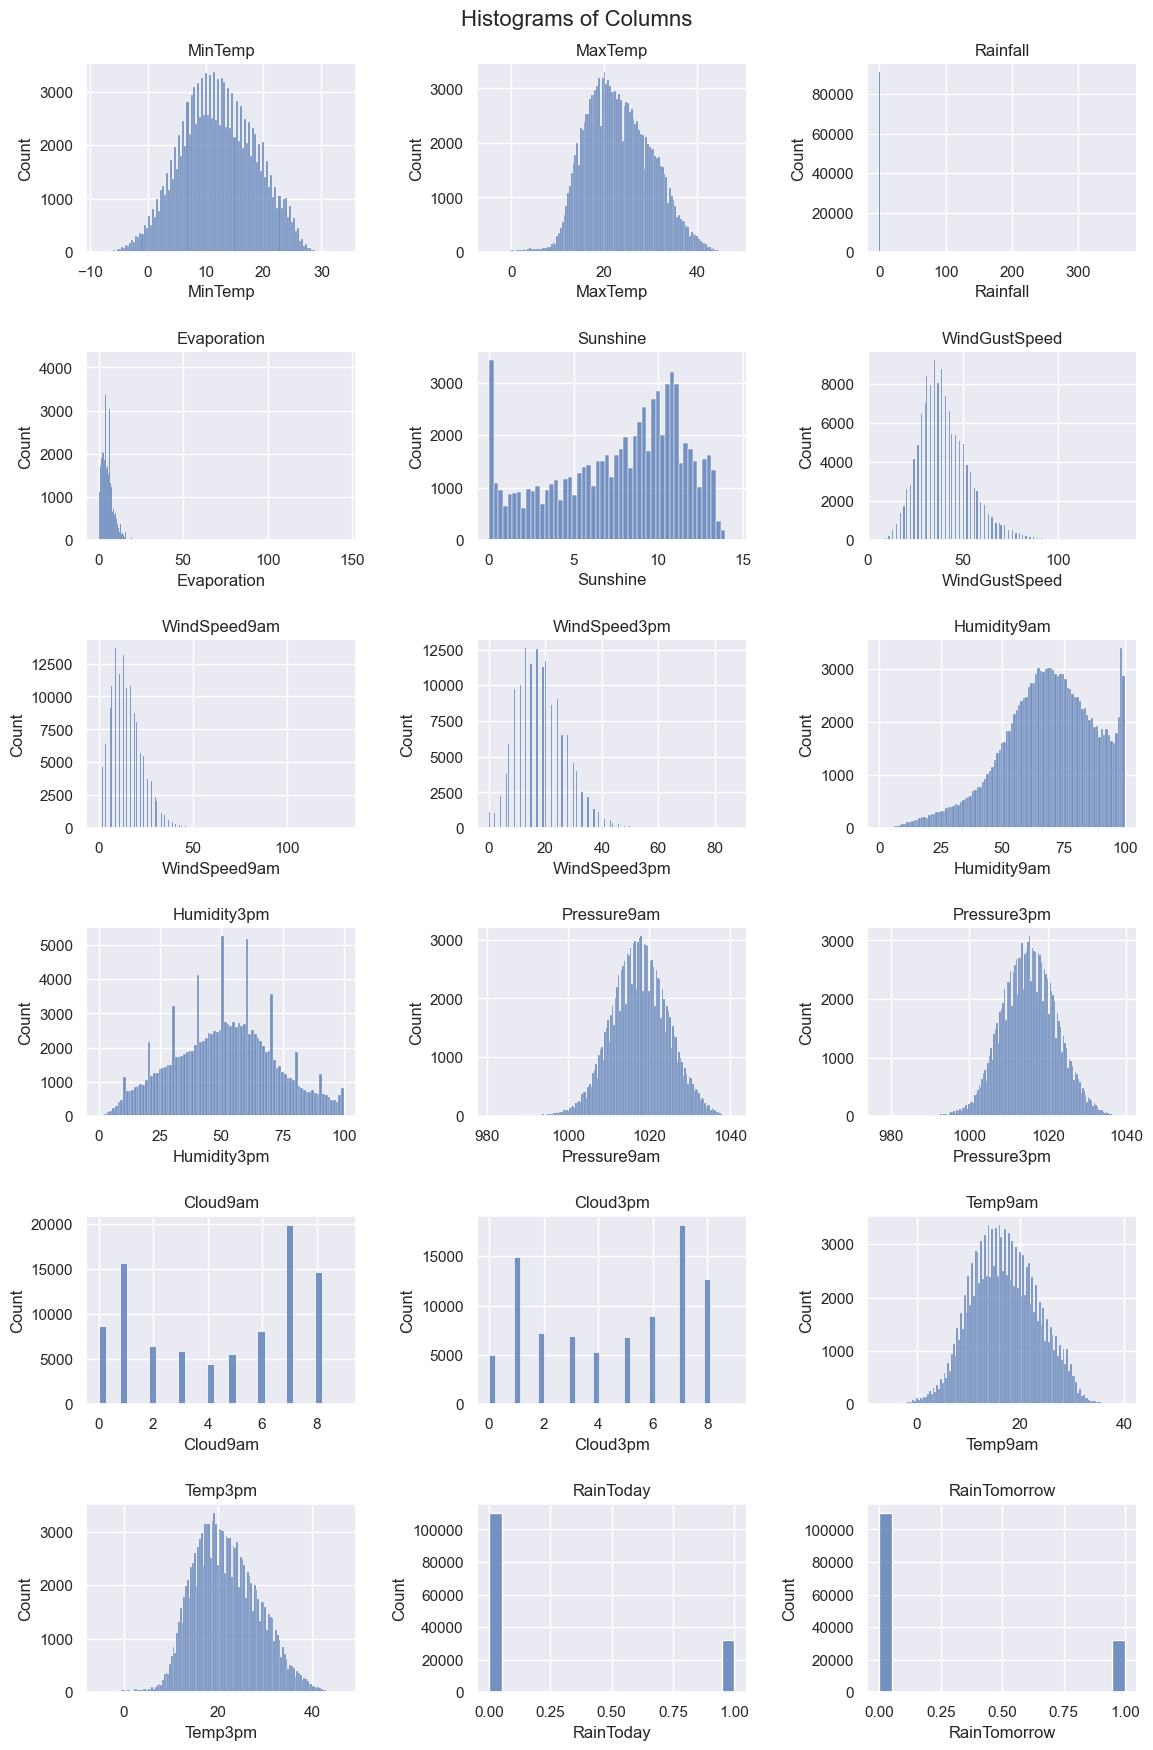

In [18]:
# Assuming WeatherAUS is your DataFrame containing the data

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.flatten()

continuous = [col for col in WeatherAUS.columns if WeatherAUS[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(WeatherAUS[col], ax=axes[i])
    axes[i].set_title(col)  # Set title for each subplot

fig.tight_layout(pad=2.0)
fig.suptitle('Histograms of Columns', fontsize=16)  # Set main title for the entire figure
fig.subplots_adjust(top=0.95)  # Adjust top position of the subplots to make room for the main title

# Enable hover mode for x-coordinate
mplcursors.cursor(hover=True)
plt.show()  # Show the plot

Observations:

1)-Most features are normally distributed as expected.
2)-The Rainfall distribution needs further investigation as the large outlier is likely affecting the ability to plot the data.
3)-The Sunshine distribution is interesting but largely explainable:
4)-The high frequency of 0 values represents days where it is overcast all day
5)-The abrupt decline in frequency after around 11 hours is a reflection of the limited number of days of the year where 
   it is light out for that many hours or longer
6)-The Humidity9am distribution is particularly interesting due to the large spike in frequencies near 100%

Since the summary statistics section showed that the 75th percentile for the Rainfall feature is only 0.8, the following plot shows the distribution of values betwen 0 and 1.

In [19]:
WeatherAUS.Rainfall

0         0.6
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: Rainfall, Length: 145460, dtype: float64

(0.0, 1.0)

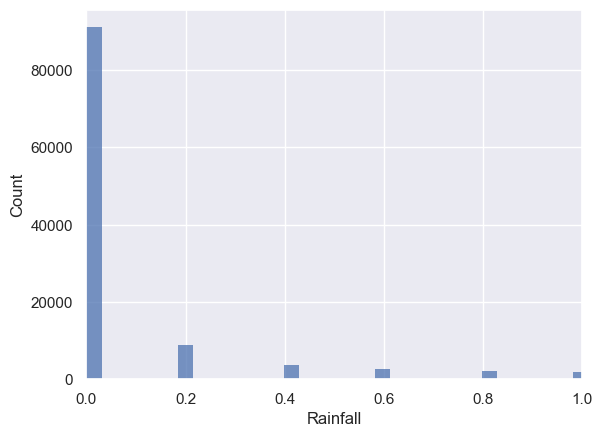

In [20]:
sns.histplot(WeatherAUS.Rainfall)
plt.xlim(0, 1)

In [21]:
#Rainy Days by Location
df_rain_by_loc = WeatherAUS.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,689.0
Albany,902.0
Albury,617.0
AliceSprings,244.0
BadgerysCreek,583.0


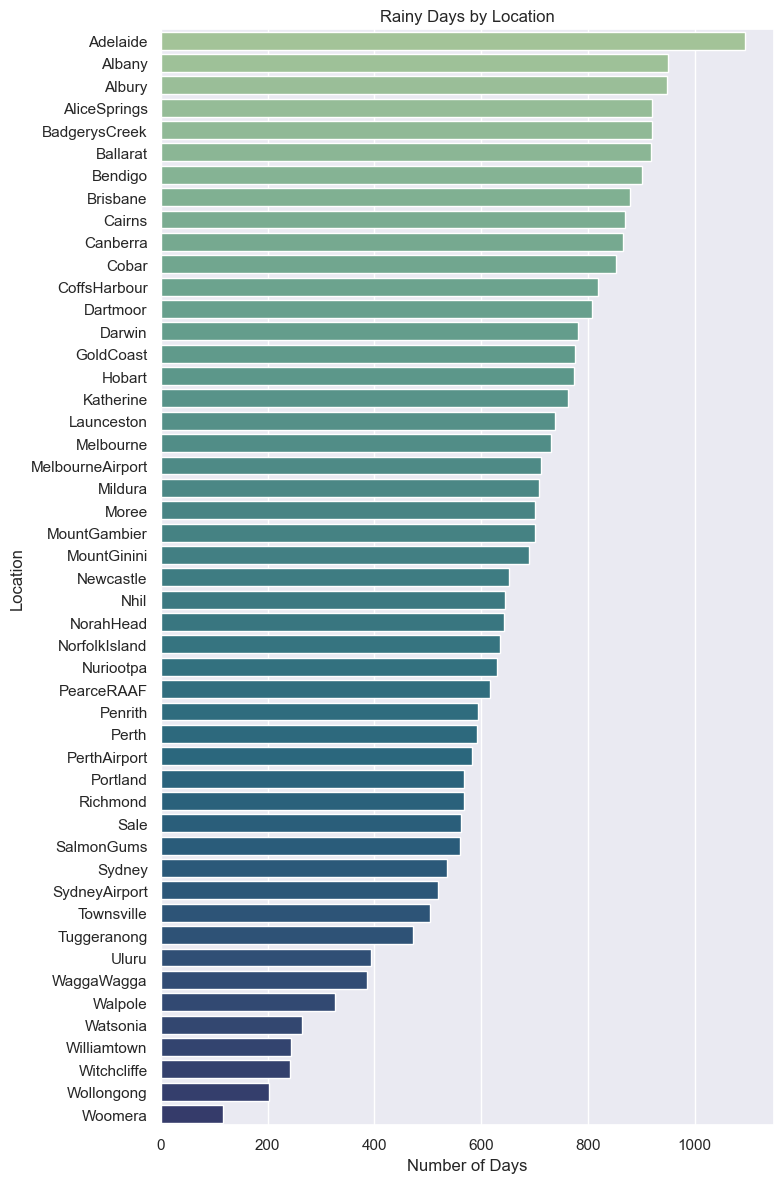

In [22]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=df_rain_by_loc.index, 
            data=df_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()

The above chart is useful for a quick check on the differences between locations with regard to the number of rainy days but suffers from one key issue: the number of observations from each location is not exactly the same. Checking the value counts for each location (below) reveals that the locations of Katherine, Nhil, and Uluru should be ignored when analyzing the above plot. The remaining locations have value counts that are close enough to be properly comparable.

In [23]:
WeatherAUS.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

Seasonality-

Rainfall exhibits seasonality in many areas of the world. Through grouping the data by month of the year, the percentage of days that it rains in a given month can be easily calculated. Any sort of trend would indicate that the month of the year is a valuable piece of information for modeling purposes.

In [24]:
df_seasonality = WeatherAUS.copy()
df_seasonality['month'] = df_seasonality.Date.apply(lambda x: int(str(x)[5:7]))
df_seasonality[['Date', 'month']].head()

,Date,month
0,2008-12-01,12
1,2008-12-02,12
2,2008-12-03,12
3,2008-12-04,12
4,2008-12-05,12


In [25]:
#df_seasonality_grouped = df_seasonality.groupby('month').mean()

In [26]:
#sns.lineplot(data=df_seasonality_grouped, x=df_seasonality_grouped.index, y='RainToday')
#plt.title('Seasonality of Rainfall')
#plt.xlabel('Month of the Year')
#plt.ylabel('Percentage of Days it Rains')
#plt.tight_layout()

Correlation Matrix

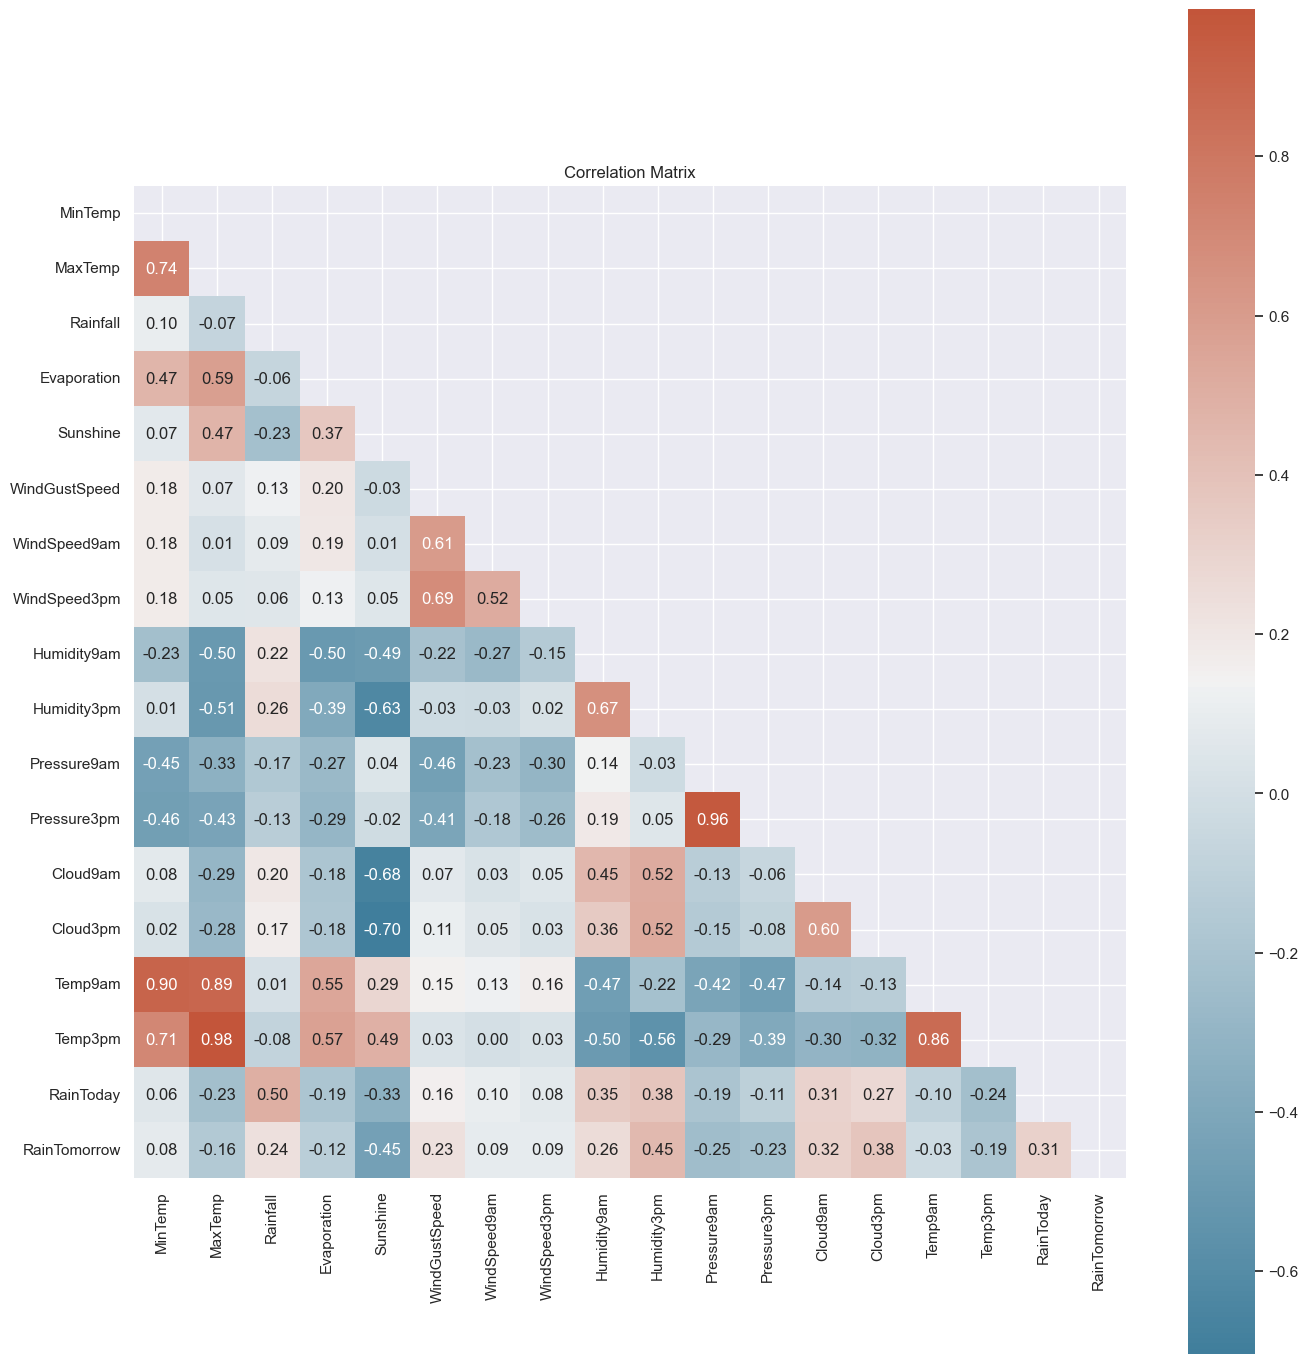

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming WeatherAUS is your DataFrame containing the data
numeric_columns = WeatherAUS.select_dtypes(include=np.number).columns

plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(WeatherAUS[numeric_columns].corr()))
# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(WeatherAUS[numeric_columns].corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()
plt.show()


Observations:

1)-Nothing in this correlation heatmap is surprising.
2)-Features with strong correlations (either positive or negative) have intuitive reasons for being so.

Data Preprocessing

In [28]:
#Missing Values
# I do not want to impute values for the target variable (RainTomorrow) since this will detract from the ground truth and have potential negative effects on the model. To start, I'll drop rows in which the RainTomorrow value is missing.
df_imputed = WeatherAUS.dropna(axis=0, subset=['RainTomorrow'])
df_imputed.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [29]:
#Continuous Features
#For the continuous features, I'll apply the IterativeImputer.
cont_feats = [col for col in df_imputed.columns if df_imputed[col].dtype != object]
cont_feats.remove('RainTomorrow')
cont_feats

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [30]:
imputer = IterativeImputer(random_state=42)
df_imputed_cont = imputer.fit_transform(df_imputed[cont_feats])
df_imputed_cont = pd.DataFrame(df_imputed_cont, columns=cont_feats)
df_imputed_cont.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.103048,16.9,21.8,0.0
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.912027,2.640581,17.2,24.3,0.0
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.014404,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.201990,1.993914,18.1,26.5,0.0
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [31]:
df_imputed_cont.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

Categorical Features-

For the categorical features, I'll be replacing the missing values with a randomly chosen option from the unique values of each feature according to their probability distribution.

In [32]:
cat_feats = [col for col in df_imputed.columns if col not in cont_feats]
cat_feats.remove('RainTomorrow')

# Also removing Date and Location since no values are missing
cat_feats.remove('Date')
cat_feats.remove('Location')
cat_feats

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [33]:

df_imputed_cat = df_imputed[cat_feats]

for col in df_imputed_cat.columns:
    values = df_imputed_cat[col].value_counts().index.values
    probs = df_imputed_cat[col].value_counts(normalize=True).values
    df_imputed_cat[col].replace(np.nan, np.random.choice(a=values, p=probs), inplace=True)

df_imputed_cat.head()


,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW


In [34]:
df_imputed_cat.isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

Concatenating
Now that the missing values have been handled, I need to place all of the separated dataframes back together into one final dataframe.

In [35]:
df_date_loc = df_imputed[['Date', 'Location']]
df_target = df_imputed.RainTomorrow

print(df_date_loc.shape)
print(df_imputed_cont.shape)
print(df_imputed_cat.shape)
print(df_target.shape)

(142193, 2)
(142193, 17)
(142193, 3)
(142193,)


In [36]:
df_imputed_final = pd.concat(objs=[df_date_loc.reset_index(drop=True), 
                                   df_imputed_cont.reset_index(drop=True), 
                                   df_imputed_cat.reset_index(drop=True), 
                                   df_target.reset_index(drop=True)
                                  ], 
                             axis=1
                            )
df_imputed_final.shape

(142193, 23)

In [37]:
df_imputed_final.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,...,1007.1,8.000000,5.103048,16.9,21.8,0.0,W,W,WNW,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,...,1007.8,1.912027,2.640581,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,...,1008.7,2.014404,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,...,1012.8,1.201990,1.993914,18.1,26.5,0.0,NE,SE,E,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


A quick check to ensure all missing values have been handled:

In [38]:
df_imputed_final.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainTomorrow     0
dtype: int64

Extracting the Month

As seen in the EDA section, rainfall in Australia exhibits seasonality. Instead of using the full date from the Date column, extracting just the month is much more valuable.

In [39]:
df_month = df_imputed_final.copy()
df_month.insert(1, 'Month', df_month.Date.apply(lambda x: int(str(x)[5:7])))
df_month.drop(columns='Date', inplace=True)
df_month.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,12,Albury,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,...,1007.1,8.000000,5.103048,16.9,21.8,0.0,W,W,WNW,0.0
1,12,Albury,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,...,1007.8,1.912027,2.640581,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,12,Albury,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,...,1008.7,2.014404,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,12,Albury,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,...,1012.8,1.201990,1.993914,18.1,26.5,0.0,NE,SE,E,0.0
4,12,Albury,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


Dummy Variables

All categorical features now need transformed into dummy variables in order to be useable in the modeling section.

In [40]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df_dummies = pd.get_dummies(df_month, columns=categoricals)
df_dummies.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [41]:
df_dummies.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=127)

Modeling

In [42]:
df_final = df_dummies.copy()
X = df_final.drop(columns='RainTomorrow')
y = df_final.RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('Train size:', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size: 106644
Test size:  35549


***************************Logistic Regression*****************************

#Baseline

In [43]:
import sklearn
print(sklearn.__version__)

1.4.0


In [44]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 1., 0.])

In [45]:
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    ConfusionMatrixDisplay(model)
    ConfusionMatrixDisplay()
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()

In [46]:
def evaluate(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, X_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, X_test, y_test)
    print('\n')
    
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')
    

In [47]:
evaluate(logreg)

Confusion Matrix
-----------------------------------------------------


NameError: name 'ConfusionMatrixDisplay' is not defined